ASSIGNMENT1

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mobiletest.csv")

In [ ]:
df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [ ]:
df.corr()

id  battery_power      blue  clock_speed  dual_sim  \
id             1.000000      -0.021511  0.000464     0.035917 -0.002721   
battery_power -0.021511       1.000000 -0.046610    -0.039075 -0.061171   
blue           0.000464      -0.046610  1.000000     0.034754 -0.011100   
clock_speed    0.035917      -0.039075  0.034754     1.000000 -0.012423   
dual_sim      -0.002721      -0.061171 -0.011100    -0.012423  1.000000   
fc             0.016934      -0.007846 -0.056063     0.010127  0.057606   
four_g         0.030921      -0.042520 -0.001169    -0.024665  0.024907   
int_memory    -0.014023       0.003751 -0.012416    -0.030487 -0.012158   
m_dep         -0.002794      -0.009065  0.018319     0.016995  0.021760   
mobile_wt     -0.007541      -0.047065  0.023513    -0.014107 -0.001734   
n_cores       -0.015935       0.025732  0.003283    -0.012247 -0.003129   
pc             0.001969       0.012847 -0.025247     0.047469  0.073936   
px_height     -0.025056       0.048647 -0.058810     0.017277  0.006842   
px_width      -0.012138       0.053365 -0.032054     0.070585  0.015610   
ram           -0.043442      -0.032366  0.057570    -0.000650  0.048171   
sc_h          -0.011972      -0.055665  0.012780    -0.039503  0.006295   
sc_w           0.002918      -0.023905  0.004223    -0.027138 -0.002064   
talk_time      0.030807       0.015546 -0.031995    -0.078797  0.004390   
three_g        0.049571       0.031514  0.013530    -0.021406  0.000690   
touch_screen   0.039768      -0.010138 -0.060031     0.061893  0.034020   
wifi          -0.036643      -0.000414  0.025568    -0.048593  0.031545   

                     fc    four_g  int_memory     m_dep  mobile_wt  ...  \
id             0.016934  0.030921   -0.014023 -0.002794  -0.007541  ...   
battery_power -0.007846 -0.042520    0.003751 -0.009065  -0.047065  ...   
blue          -0.056063 -0.001169   -0.012416  0.018319   0.023513  ...   
clock_speed    0.010127 -0.024665   -0.030487  0.016995  -0.014107  ...   
dual_sim       0.057606  0.024907   -0.012158  0.021760  -0.001734  ...   
fc             1.000000  0.032832   -0.006565  0.020859   0.018353  ...   
four_g         0.032832  1.000000   -0.037488  0.014806  -0.000509  ...   
int_memory    -0.006565 -0.037488    1.000000 -0.004386  -0.010447  ...   
m_dep          0.020859  0.014806   -0.004386  1.000000  -0.041994  ...   
mobile_wt      0.018353 -0.000509   -0.010447 -0.041994   1.000000  ...   
n_cores        0.020828  0.066716    0.021601  0.010062  -0.038908  ...   
pc             0.659338  0.037669    0.022682  0.012663   0.027343  ...   
px_height     -0.017982  0.033655   -0.009564  0.062559   0.011157  ...   
px_width       0.030550  0.036545   -0.003877  0.034861  -0.014577  ...   
ram           -0.051997  0.030821   -0.007107  0.018349   0.028786  ...   
sc_h           0.045158 -0.015087   -0.009249 -0.026160  -0.022053  ...   
sc_w           0.006115 -0.000893    0.024521 -0.023393   0.022148  ...   
talk_time     -0.051458  0.013692    0.023759  0.024124  -0.021704  ...   
three_g       -0.011121  0.553528   -0.015922 -0.029278   0.006262  ...   
touch_screen   0.015467 -0.010003    0.022186  0.040254   0.044525  ...   
wifi          -0.060373 -0.035652    0.011860 -0.039705   0.069762  ...   

                     pc  px_height  px_width       ram      sc_h      sc_w  \
id             0.001969  -0.025056 -0.012138 -0.043442 -0.011972  0.002918   
battery_power  0.012847   0.048647  0.053365 -0.032366 -0.055665 -0.023905   
blue          -0.025247  -0.058810 -0.032054  0.057570  0.012780  0.004223   
clock_speed    0.047469   0.017277  0.070585 -0.000650 -0.039503 -0.027138   
dual_sim       0.073936   0.006842  0.015610  0.048171  0.006295 -0.002064   
fc             0.659338  -0.017982  0.030550 -0.051997  0.045158  0.006115   
four_g         0.037669   0.033655  0.036545  0.030821 -0.015087 -0.000893   
int_memory     0.022682  -0.009564 -0.003877 -0.007107 -0.009249  0.024521   
m_dep          0.

In [ ]:
df.dropna()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [ ]:
df.tail()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[5 rows x 21 columns]

In [ ]:
import seaborn as sns

<Axes: ylabel='Count'>

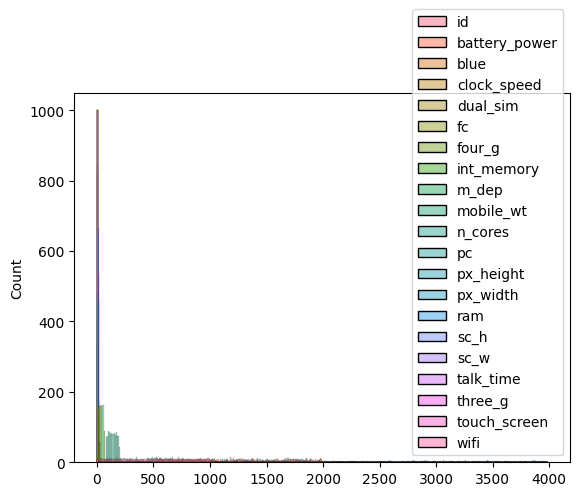

In [ ]:
sns.histplot(df)

In [ ]:
df.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [ ]:
X=df.drop('ram',axis=1)
y=df['ram']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.nunique(), activation='softmax'))  # Number of unique categories in the 'ram' column

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1344      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 872)               56680     
                                                                 
Total params: 62,184
Trainable params: 62,184
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Model trainin
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 1s 14ms/step - loss: 6.8068 - accuracy: 0.0000e+00 - val_loss: 6.8653 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 6.6118 - accuracy: 0.0125 - val_loss: 7.0391 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 6.3196 - accuracy: 0.0188 - val_loss: 7.5178 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 5.8512 - accuracy: 0.0213 - val_loss: 8.3023 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 5.2552 - accuracy: 0.0650 - val_loss: 9.1590 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 4.5412 - accuracy: 0.1675 - val_loss: 10.1570 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 3.7078 - accuracy: 0.4712 - val_loss: 11.2525 - val_accura

ASSIGNMENT-2

In [ ]:
(X_train,y_train),(X_test,y_test)= keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
len(y_train)

60000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt

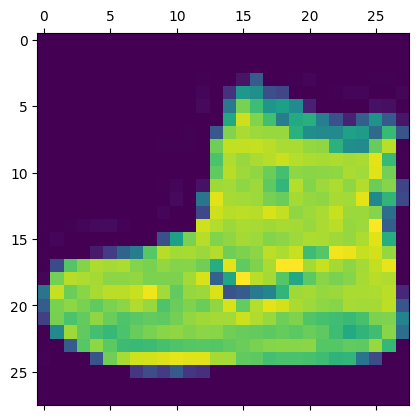

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train=X_train/255

In [ ]:
X_test=X_test/255


In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:

X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5968 - accuracy: 0.7975
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4598 - accuracy: 0.8425
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4356 - accuracy: 0.8498
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4208 - accuracy: 0.8556
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4134 - accuracy: 0.8583


In [ ]:
model.evaluate(X_test_flattened,y_test)
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([5.7397067e-04, 1.9249310e-04, 1.3360603e-02, 4.9918261e-03,
       7.2850208e-03, 9.8740327e-01, 2.3625547e-02, 9.9107754e-01,
       8.4894788e-01, 9.9813449e-01], dtype=float32)

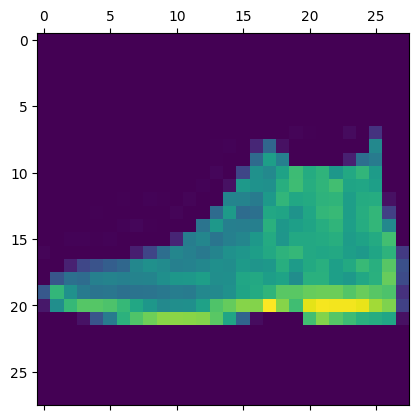

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

9

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cmf = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cmf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[832,   4,  13,  57,   4,   0,  78,   0,  12,   0],
       [  3, 964,   2,  25,   4,   0,   0,   0,   2,   0],
       [ 23,   6, 775,  14,  99,   1,  76,   0,   6,   0],
       [ 24,  14,  15, 890,  19,   0,  34,   0,   4,   0],
       [  0,   3, 157,  58, 677,   0,  97,   0,   8,   0],
       [  0,   0,   0,   1,   0, 907,   0,  60,   2,  30],
       [157,   3, 142,  56,  76,   0, 547,   0,  19,   0],
       [  0,   0,   0,   0,   0,  25,   0, 955,   0,  20],
       [  4,   1,   6,   9,   2,   5,  21,   4, 948,   0],
       [  0,   0,   0,   0,   0,   8,   0,  54,   1, 937]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

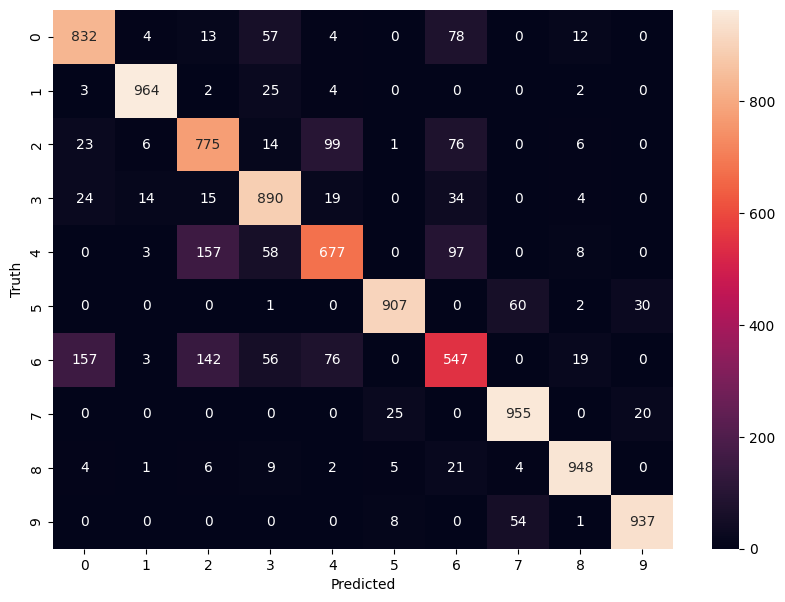

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cmf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.8432


[0.45089876651763916, 0.8432000279426575]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5056 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3823 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3448 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3192 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3028 - accuracy: 0.8883


ASSIGNMENT-3

In [ ]:
ds=pd.read_csv("/content/drive/MyDrive/penguins.csv")

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ds.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [ ]:
ds.corr()

<ipython-input-45-31b754434382>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
rowid              1.000000        0.766039      -0.259563           0.455372   
bill_length_mm     0.766039        1.000000      -0.235053           0.656181   
bill_depth_mm     -0.259563       -0.235053       1.000000          -0.583851   
flipper_length_mm  0.455372        0.656181      -0.583851           1.000000   
body_mass_g        0.275493        0.595110      -0.471916           0.871202   
year               0.339103        0.054545      -0.060354           0.169675   

                   body_mass_g      year  
rowid                 0.275493  0.339103  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000

In [ ]:
ds.dropna()

rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
4        5     Adelie  Torgersen            36.7           19.3   
5        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
4                193.0       3450.0  female  2007  
5                190.0       3650.0    male  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[333 rows x 9 columns]

In [ ]:
featured = ['Flipper Lenght(mm)','Beak Length(mm)','Beak Width(mm)','Body Mass(g)']
target='Species'

In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'
actual_features = ds.columns[3:7]
if not set(features).issubset(actual_features):
    raise ValueError("Invalid feature names provided")

X = ds[features]
y = ds[target]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/50
18/18 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.3818 - val_loss: nan - val_accuracy: 0.4638
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4364 - val_loss: nan - val_accuracy: 0.4638
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4364 - val_loss: nan - val_accuracy: 0.4638
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4364 - val_loss: nan - val_accuracy: 0.4638
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4364 - val_loss: nan - val_accuracy: 0.4638
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4364 - val_loss: nan - val_accuracy: 0.4638
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4364 - val_loss: nan - val_accuracy: 0.4638
Epoch 8/50
18/18 [==============================] - 0s 6ms/st

ASSIGNMENT-4

In [ ]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
df.dropna()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [ ]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(14.5, -0.5)

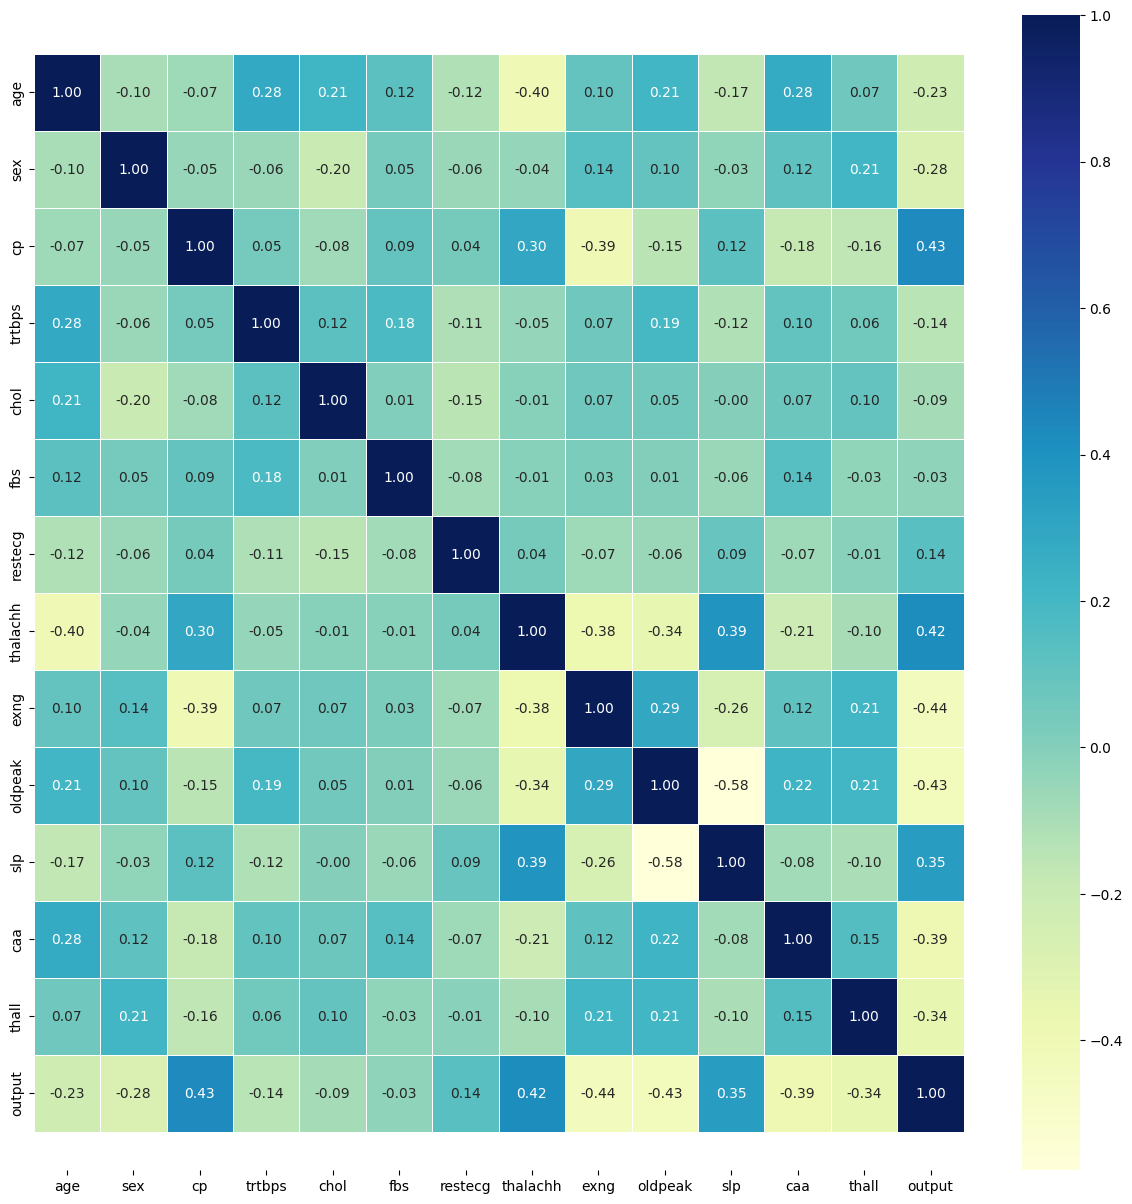

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<Axes: ylabel='Count'>

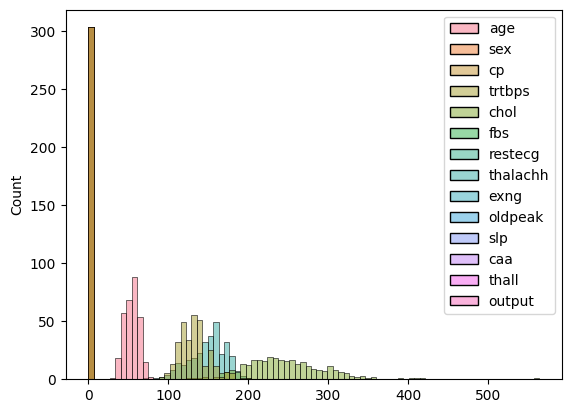

In [ ]:
sns.histplot(df)

In [ ]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

<Axes: >

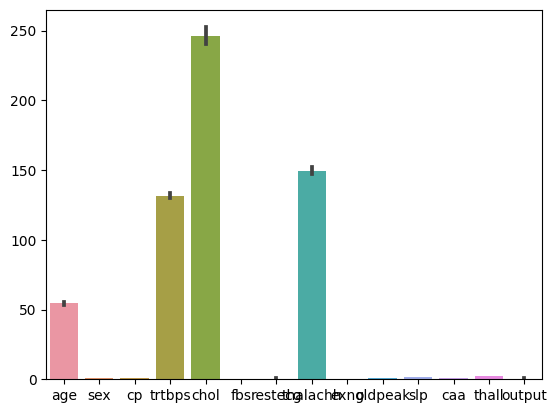

In [ ]:
sns.barplot(df)

In [ ]:
X = df.drop('output', axis=1).values
y = df['output'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/100
8/8 [==============================] - 3s 119ms/step - loss: 0.7432 - accuracy: 0.4628 - val_loss: 0.7374 - val_accuracy: 0.4590
Epoch 2/100
8/8 [==============================] - 0s 33ms/step - loss: 0.7047 - accuracy: 0.5207 - val_loss: 0.6959 - val_accuracy: 0.5082
Epoch 3/100
8/8 [==============================] - 0s 30ms/step - loss: 0.6740 - accuracy: 0.6116 - val_loss: 0.6623 - val_accuracy: 0.6230
Epoch 4/100
8/8 [==============================] - 0s 23ms/step - loss: 0.6472 - accuracy: 0.7066 - val_loss: 0.6315 - val_accuracy: 0.7377
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6223 - accuracy: 0.7355 - val_loss: 0.6030 - val_accuracy: 0.7705
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5992 - accuracy: 0.7810 - val_loss: 0.5760 - val_accuracy: 0.7869
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 0.5745 - accuracy: 0.8099 - val_loss: 0.5508 - val_accuracy: 0.8197
Epoch 8/100
8/8 [==